In [41]:
import tensorflow as tf
import numpy as np
import time
import os

In [30]:
# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [31]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Adjusted to 10 output classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,204,682 (4.60 MB)

 Trainable params: 1,204,682 (4.60 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, validation_split=0.1)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.4123 - loss: 1.6197 - val_accuracy: 0.6266 - val_loss: 1.0791
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 142s 59ms/step - accuracy: 0.6354 - loss: 1.0334 - val_accuracy: 0.6778 - val_loss: 0.9420
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.7112 - loss: 0.8244 - val_accuracy: 0.6990 - val_loss: 0.8674
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.7674 - loss: 0.6674 - val_accuracy: 0.7180 - val_loss: 0.8513
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.8163 - loss: 0.5274 - val_accuracy: 0.7258 - val_loss: 0.8479


In [36]:
# Save model as h5
model.save('cifar10_h5_model.h5')

In [37]:
# Convert model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('cifar10_tflite_model.tflite', "wb") as f :
    f.write(tflite_model)

Saved artifact at '/tmp/tmpm0p9m8sa'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor_16')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  138327405147264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327405142336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327405144272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327405149552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327405149200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327405146912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327405134240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138327405141104: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [58]:
!pip install tf2onnx
!pip install onnx
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.9 MB/s eta 0:00:00


In [39]:
# Convert model to ONNX
import tf2onnx
import onnx

model.output_names = ['output']
spec = (tf.TensorSpec((None, 32, 32, 3), tf.float32, name='input'),)
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature=spec)
onnx.save_model(onnx_model, 'cifar10_onnx_model.onnx')

In [66]:
# Load .h5 model
model = tf.keras.models.load_model('cifar10_h5_model.h5')

# Measure model file size
h5_file_size = os.path.getsize('cifar10_h5_model.h5') / (1024 * 1024)  # Size in MB

# Evaluate model accuracy on the test set
h5_test_loss, h5_test_accuracy = model.evaluate(test_images, test_labels, verbose=0)

# Perform inference and measure inference time
sample_image = np.expand_dims(test_images[0], axis=0)
start_time = time.time()
predictions = model.predict(sample_image)
end_time = time.time()
h5_inference_time = end_time - start_time
h5_predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class for .h5 model: {h5_predicted_class[0]}")
print(f"Inference time for .h5 model: {h5_inference_time} seconds")
print(f"Accuracy for .h5 model: {h5_test_accuracy:.2f}")
print(f"File size for .h5 model: {h5_file_size:.2f} MB")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted class for .h5 model: 3
Inference time for .h5 model: 0.12818098068237305 seconds
Accuracy for .h5 model: 0.71
File size for .h5 model: 13.82 MB


In [67]:

# Load .tflite model
interpreter = tf.lite.Interpreter(model_path="cifar10_tflite_model.tflite")
interpreter.allocate_tensors()

# Measure model file size
tflite_file_size = os.path.getsize('cifar10_tflite_model.tflite') / (1024 * 1024)  # Size in MB

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Evaluate model accuracy on the test set
correct_predictions = 0
for i in range(len(test_images)):
    sample_image = np.expand_dims(test_images[i], axis=0)
    interpreter.set_tensor(input_details[0]['index'], sample_image)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_class = np.argmax(output_data, axis=1)
    correct_predictions += (predicted_class[0] == test_labels[i][0])

tflite_accuracy = correct_predictions / len(test_images)

# Perform inference and measure inference time on a single image
sample_image = np.expand_dims(test_images[0], axis=0)
start_time = time.time()
interpreter.set_tensor(input_details[0]['index'], sample_image)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
end_time = time.time()
tflite_inference_time = end_time - start_time
tflite_predicted_class = np.argmax(output_data, axis=1)

print(f"Predicted class for .tflite model: {tflite_predicted_class[0]}")
print(f"Inference time for .tflite model: {tflite_inference_time} seconds")
print(f"Accuracy for .tflite model: {tflite_accuracy:.2f}")
print(f"File size for .tflite model: {tflite_file_size:.2f} MB")

Predicted class for .tflite model: 3
Inference time for .tflite model: 0.0006892681121826172 seconds
Accuracy for .tflite model: 0.71
File size for .tflite model: 4.60 MB


In [68]:
import onnxruntime as ort

# Load .onnx model
onnx_model_path = 'cifar10_onnx_model.onnx'
session = ort.InferenceSession(onnx_model_path)

# Measure model file size
onnx_file_size = os.path.getsize('cifar10_onnx_model.onnx') / (1024 * 1024)  # Size in MB

# Get model input and output details
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Evaluate model accuracy on the test set
correct_predictions = 0
for i in range(len(test_images)):
    sample_image = np.expand_dims(test_images[i], axis=0)
    predictions = session.run([output_name], {input_name: sample_image})[0]
    predicted_class = np.argmax(predictions, axis=1)
    correct_predictions += (predicted_class[0] == test_labels[i][0])

onnx_accuracy = correct_predictions / len(test_images)

# Perform inference and measure inference time on a single image
sample_image = np.expand_dims(test_images[0], axis=0)
start_time = time.time()
predictions = session.run([output_name], {input_name: sample_image})[0]
end_time = time.time()
onnx_inference_time = end_time - start_time
onnx_predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class for .onnx model: {onnx_predicted_class[0]}")
print(f"Inference time for .onnx model: {onnx_inference_time} seconds")
print(f"Accuracy for .onnx model: {onnx_accuracy:.2f}")
print(f"File size for .onnx model: {onnx_file_size:.2f} MB")

Predicted class for .onnx model: 3
Inference time for .onnx model: 0.0008292198181152344 seconds
Accuracy for .onnx model: 0.71
File size for .onnx model: 4.60 MB


In [77]:
import pandas as pd
from tabulate import tabulate

# Example metrics obtained from previous runs (replace with actual values from your runs)
h5_model_metrics = {
    'Model': '.h5 Model',
    'File Size (MB)': round(h5_file_size, 2),            # replace with actual h5 model file size in MB
    'Accuracy': round(h5_test_accuracy, 4),                 # replace with actual accuracy of h5 model on test data
    'Inference Time (s)': h5_inference_time    # replace with actual inference time of h5 model in seconds
}

tflite_model_metrics = {
    'Model': '.tflite Model',
    'File Size (MB)': round(tflite_file_size, 2),        # replace with actual tflite model file size in MB
    'Accuracy': round( tflite_accuracy, 4),               # replace with actual accuracy of tflite model on test data
    'Inference Time (s)': tflite_inference_time # replace with actual inference time of tflite model in seconds
}

onnx_model_metrics = {
    'Model': '.onnx Model',
    'File Size (MB)': round(onnx_file_size, 2),          # replace with actual onnx model file size in MB
    'Accuracy': round(onnx_accuracy, 4),                 # replace with actual accuracy of onnx model on test data
    'Inference Time (s)': onnx_inference_time  # replace with actual inference time of onnx model in seconds
}

# Combine the data into a DataFrame
comparison_df = pd.DataFrame([h5_model_metrics, tflite_model_metrics, onnx_model_metrics])

# Print the table
print("Model Comparison Table:")
print(tabulate(comparison_df, headers='keys', tablefmt='pretty'))


Model Comparison Table:
+---+---------------+----------------+----------+-----------------------+
|   |     Model     | File Size (MB) | Accuracy |  Inference Time (s)   |
+---+---------------+----------------+----------+-----------------------+
| 0 |   .h5 Model   |     13.82      |  0.7098  |  0.12818098068237305  |
| 1 | .tflite Model |      4.6       |  0.7098  | 0.0006892681121826172 |
| 2 |  .onnx Model  |      4.6       |  0.7098  | 0.0008292198181152344 |
+---+---------------+----------------+----------+-----------------------+


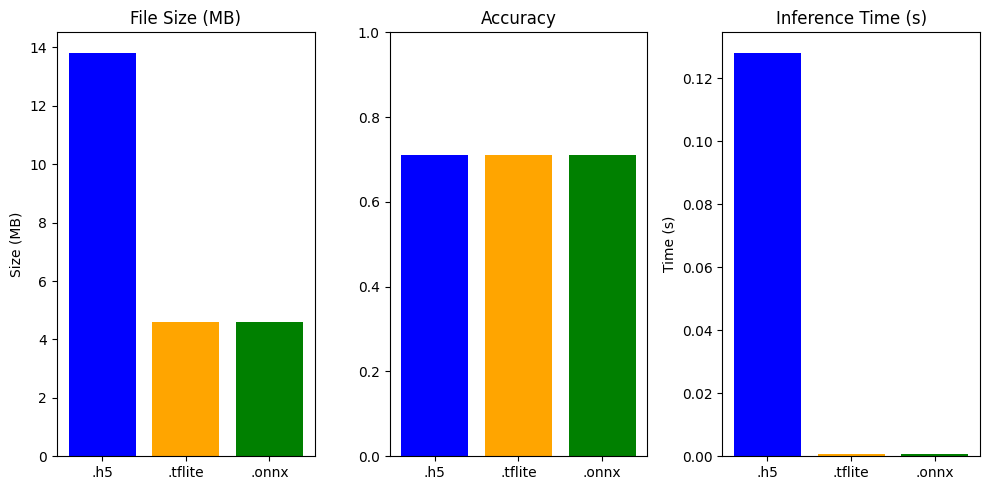

In [ ]:
import matplotlib.pyplot as plt

models = ['.h5', '.tflite', '.onnx']
file_sizes = [h5_file_size, tflite_file_size, onnx_file_size]
accuracies = [h5_test_accuracy, tflite_accuracy, onnx_accuracy]
inference_times = [h5_inference_time, tflite_inference_time, onnx_inference_time]

# file size plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(models, file_sizes, color=['blue', 'orange', 'green'])
plt.title('File Size (MB)')
plt.ylabel('Size (MB)')

# Accuracy plot
plt.subplot(1, 3, 2)
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.title('Accuracy')
plt.ylim(0, 1)

# inference time plot
plt.subplot(1, 3, 3)
plt.bar(models, inference_times, color=['blue', 'orange', 'green'])
plt.title('Inference Time (s)')
plt.ylabel('Time (s)')

plt.tight_layout()
plt.show()
